In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
y_train_full.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
img = X_train_full[0]

In [11]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

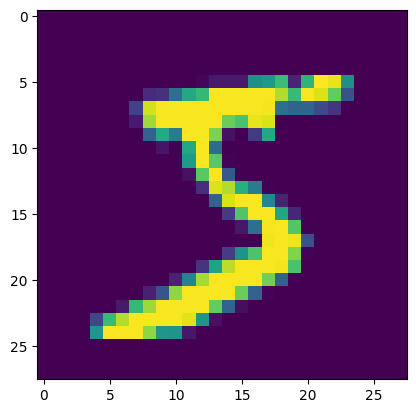

In [13]:
plt.imshow(img)

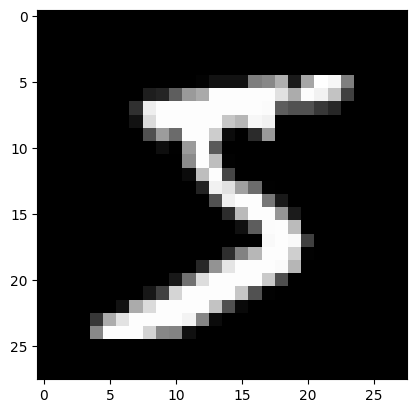

In [17]:
plt.imshow(img, cmap='gray')

In [18]:
label = y_train_full[0]
label

5

In [19]:
# as we can label is 5 and we can see that there is a number 5 in the image.

<Axes: >

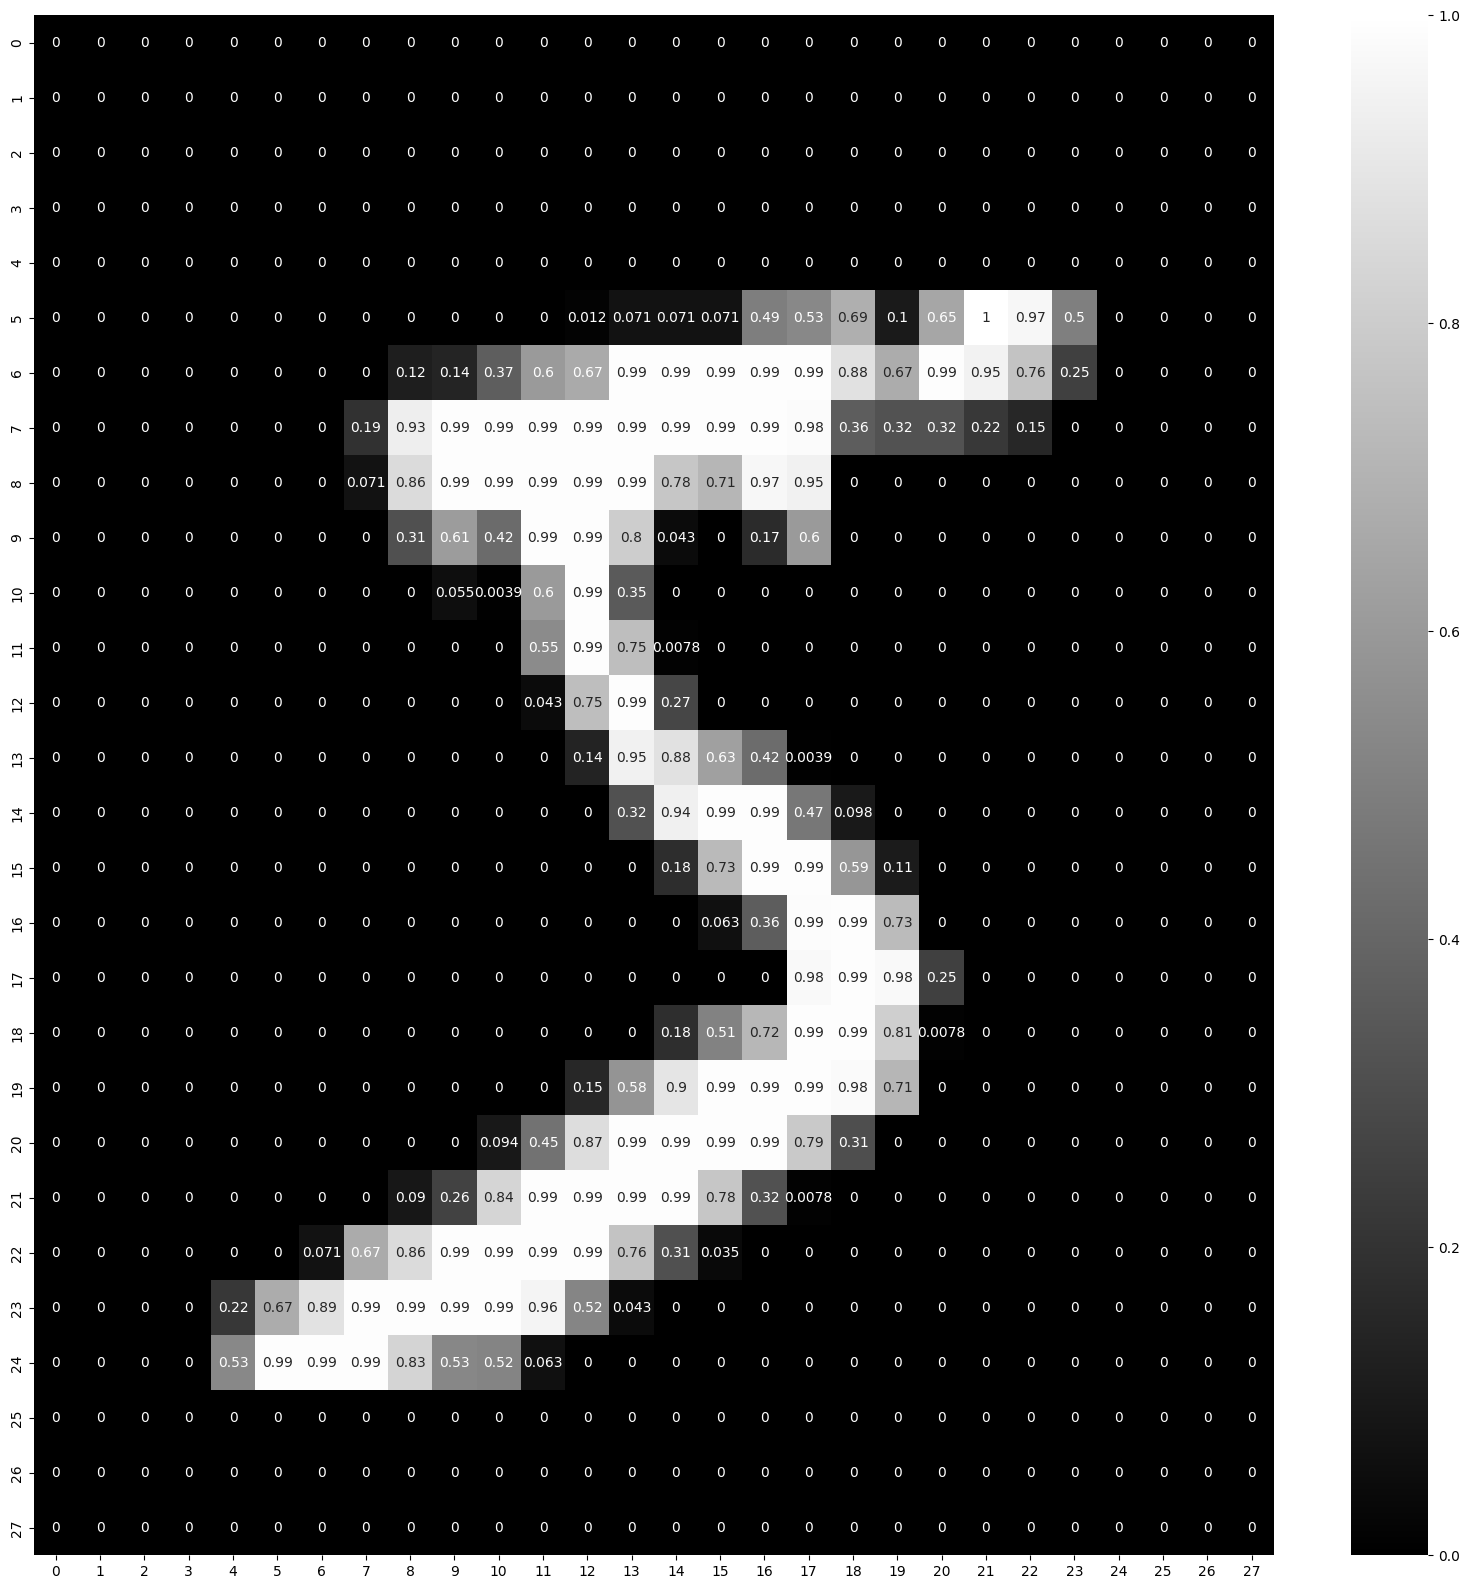

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap='gray')

In [21]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [22]:
1.5e+2 + 3

153.0

In [23]:
1.5 * 10 ** 2

150.0

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.

In [24]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [25]:
X_test = X_test/255

In [27]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [31]:
len(np.unique(y_train))

10

In [32]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [37]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28), name='Input_Layer'),
    tf.keras.layers.Dense(300, activation='relu', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(100, activation='relu', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(CLASSES, activation='softmax', name='Output_Layer')
]

In [38]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [39]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer = OPTIMIZER, metrics=METRICS)

In [47]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    validation_data=VALIDATION,
    epochs=EPOCHS,
    batch_size=32
)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6079 - accuracy: 0.8436 - val_loss: 0.3054 - val_accuracy: 0.9160
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2855 - accuracy: 0.9194 - val_loss: 0.2354 - val_accuracy: 0.9338
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2345 - accuracy: 0.9340 - val_loss: 0.2001 - val_accuracy: 0.9444
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2006 - accuracy: 0.9426 - val_loss: 0.1783 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1747 - accuracy: 0.9503 - val_loss: 0.1589 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1540 - accuracy: 0.9555 - val_loss: 0.1433 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1373 - accuracy: 0.9611 - val_loss: 0.1318 - val_accuracy:

In [48]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607884,0.843636,0.305362,0.9160
1,0.285474,0.919436,0.235417,0.9338
2,0.234465,0.933982,0.200103,0.9444
3,0.200634,0.942582,0.178289,0.9512
4,0.174674,0.950309,0.158920,0.9560
5,0.153986,0.955473,0.143321,0.9606
6,0.137339,0.961109,0.131795,0.9628
7,0.123262,0.964364,0.120055,0.9680
8,0.111777,0.968145,0.112137,0.9702
9,0.101597,0.971491,0.110909,0.9696


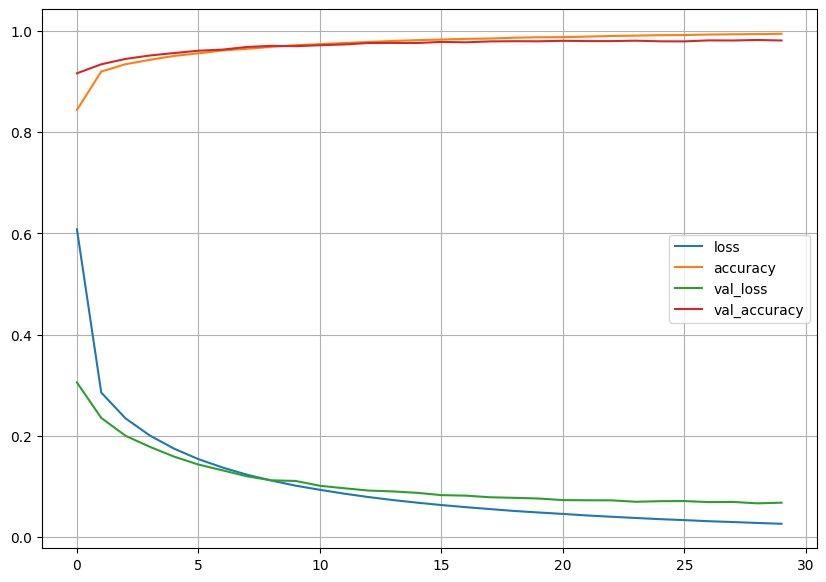

In [49]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [50]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9787


[0.06953894346952438, 0.9786999821662903]

In [51]:
10000/32

312.5

In [52]:
model_clf.save("mnist_full.h5")

In [53]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [54]:
X_new.shape

(3, 28, 28)

In [55]:
y_prob.shape

(3, 10)

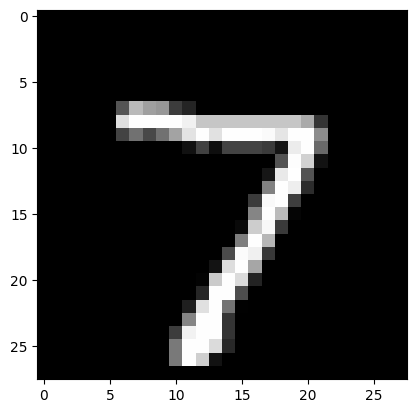

In [56]:
plt.imshow(X_new[0], cmap="gray")

In [57]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1], dtype=int64)

In [58]:
for kohli, dhoni, dravid in zip([1,2,3], [3,2,1], [3,3,3]):
    print(kohli, dhoni, dravid)

1 3 3
2 2 3
3 1 3


In [59]:
list(zip([1,2,3], [3,2,1], [3,3,3]))

[(1, 3, 3), (2, 2, 3), (3, 1, 3)]

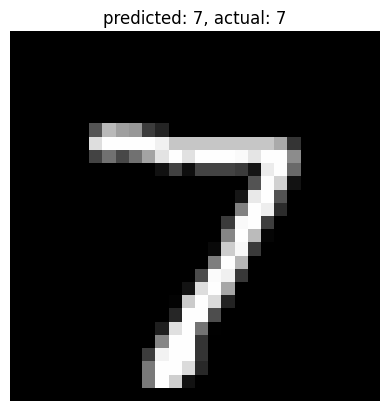

------------------------------------------------------------


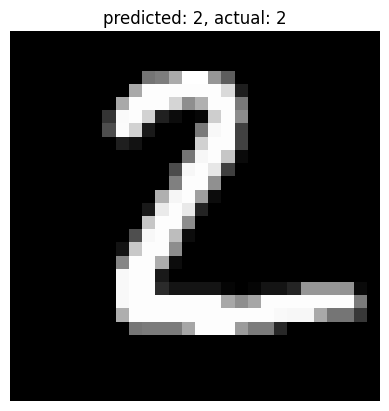

------------------------------------------------------------


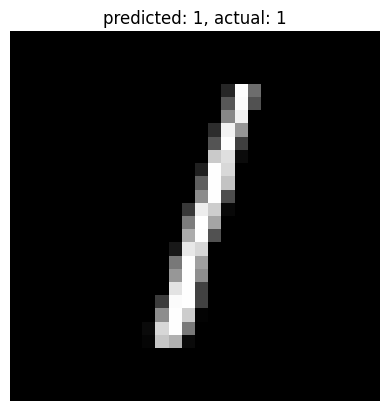

------------------------------------------------------------


In [60]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Transfer Learning

In [84]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [85]:
pretrained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [86]:
for layer in pretrained_model.layers:
    print(f"{layer.name} : {layer.trainable}")

Input_Layer : True
Hidden_Layer_1 : True
Hidden_Layer_2 : True
Output_Layer : True


In [87]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [88]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

Input_Layer: False
Hidden_Layer_1: False
Hidden_Layer_2: False
Output_Layer: True


In [89]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [90]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [91]:
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 202       
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [92]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [93]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [94]:
for idx, label in enumerate(ex_1):
    # print(idx, label)
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))

1 0
2 1
3 0
4 1
5 0


In [95]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [96]:
np.unique(y_train_bin)

array([0, 1])

In [97]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [98]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1781 - accuracy: 0.9348 - val_loss: 0.1325 - val_accuracy: 0.9546
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1242 - accuracy: 0.9560 - val_loss: 0.1165 - val_accuracy: 0.9600
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1115 - accuracy: 0.9608 - val_loss: 0.1080 - val_accuracy: 0.9634
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1043 - accuracy: 0.9637 - val_loss: 0.1041 - val_accuracy: 0.9650
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0999 - accuracy: 0.9653 - val_loss: 0.0992 - val_accuracy: 0.9666
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0967 - accuracy: 0.9669 - val_loss: 0.1001 - val_accuracy: 0.9664
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0944 - accuracy: 0.9671 - val_loss: 0.0960 - val_accuracy:

In [99]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 4ms/step - loss: 0.0974 - accuracy: 0.9648


[0.09740697592496872, 0.9648000001907349]

In [100]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

array([[0.934, 0.066],
       [0.008, 0.992],
       [0.979, 0.021]], dtype=float32)

In [101]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0], dtype=int64)

In [102]:
y_test_bin[:3]

array([0, 1, 0])

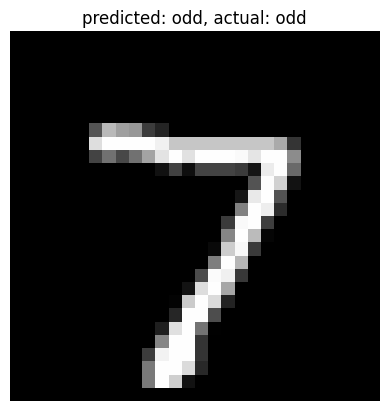

------------------------------------------------------------


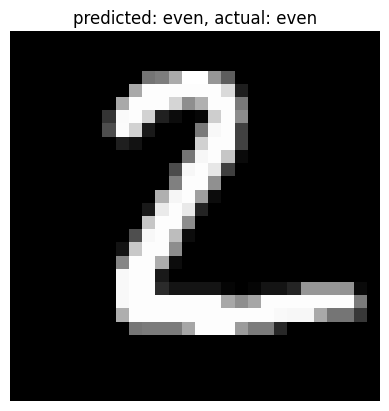

------------------------------------------------------------


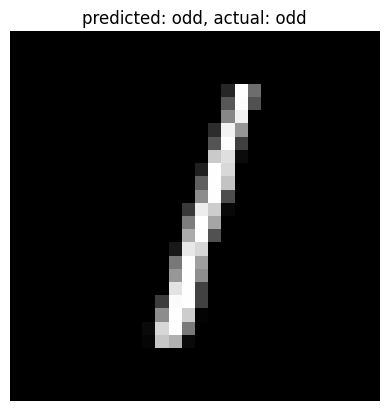

------------------------------------------------------------


In [103]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Now we use CNN


We have seen that ANN is working fine with the small problems and when we flatten the image 
but now we will use CNN, as you will see that it will take less time to train because CNN don't have that much parameter.

In [104]:
X_train[0].shape

(28, 28)

In [105]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [109]:
np.expand_dims(X_train, -1).shape # -1 is the position where we want to add the dimention
# we are adding an extra dimention because CNN use channel.

(55000, 28, 28, 1)

In [110]:
np.expand_dims(X_train, -2).shape

(55000, 28, 1, 28)

In [111]:
np.expand_dims(X_train, -3).shape

(55000, 1, 28, 28)

In [112]:
np.expand_dims(X_train, 1).shape

(55000, 1, 28, 28)

In [113]:
np.expand_dims(X_train, 3).shape

(55000, 28, 28, 1)

In [114]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [115]:
X_train_CNN.shape, X_test_CNN.shape, X_valid_CNN.shape

((55000, 28, 28, 1), (10000, 28, 28, 1), (5000, 28, 28, 1))

In [116]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [117]:
X_train_CNN[0].shape

(28, 28, 1)

In [125]:
input_shape = (28,28,1)
CLASSES = 10

LAYERS = [
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation='softmax')
]

In [126]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [127]:
CNN_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [128]:
64*5*5

1600

In [129]:
(3*3*1 + 1) * 32

320

In [130]:
(28 - 3) // 1 + 1

26

In [131]:
(26 - 2) // 2 + 1

13

In [132]:
(3*3*32 + 1) * 64

18496

In [133]:
1600 * 10 + 10

16010

In [135]:
CNN_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

In [137]:
X_train_CNN.shape, X_valid_CNN.shape, X_test_CNN.shape

((55000, 28, 28, 1), (5000, 28, 28, 1), (10000, 28, 28, 1))

In [136]:
history = CNN_model.fit(
    X_train_CNN,
    y_train,
    validation_data=(X_valid_CNN, y_valid),
    epochs = 10
)

Epoch 1/10
1719/1719 [==============================] - 17s 6ms/step - loss: 0.5935 - accuracy: 0.8301 - val_loss: 0.2134 - val_accuracy: 0.9386
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1714 - accuracy: 0.9493 - val_loss: 0.1225 - val_accuracy: 0.9642
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1209 - accuracy: 0.9639 - val_loss: 0.1048 - val_accuracy: 0.9692
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0983 - accuracy: 0.9703 - val_loss: 0.1001 - val_accuracy: 0.9704
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0861 - accuracy: 0.9737 - val_loss: 0.0814 - val_accuracy: 0.9750
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0774 - accuracy: 0.9767 - val_loss: 0.0754 - val_accuracy: 0.9772
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0708 - accuracy: 0.9783 - val_loss: 0.0812 - val_accurac

In [138]:
CNN_model.evaluate(X_test_CNN,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9830


[0.05054640397429466, 0.9829999804496765]

In [140]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.593507,0.830109,0.213406,0.9386
1,0.171428,0.949273,0.122462,0.9642
2,0.120938,0.963927,0.104758,0.9692
3,0.098271,0.970327,0.100054,0.9704
4,0.086065,0.973691,0.081366,0.9750
5,0.077419,0.976655,0.075366,0.9772
6,0.070840,0.978255,0.081184,0.9734
7,0.066575,0.979673,0.068054,0.9796
8,0.060961,0.981345,0.065080,0.9818
9,0.057792,0.982145,0.059295,0.9816


<Axes: >

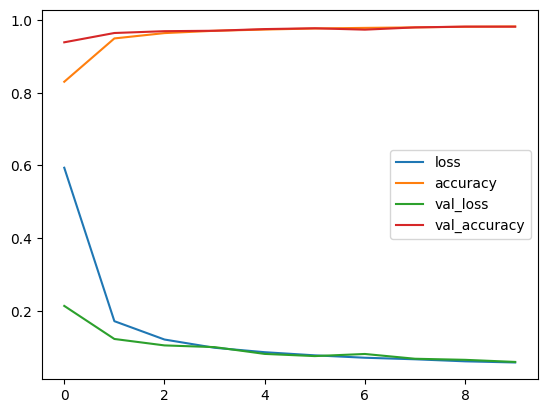

In [144]:
history_df.plot()

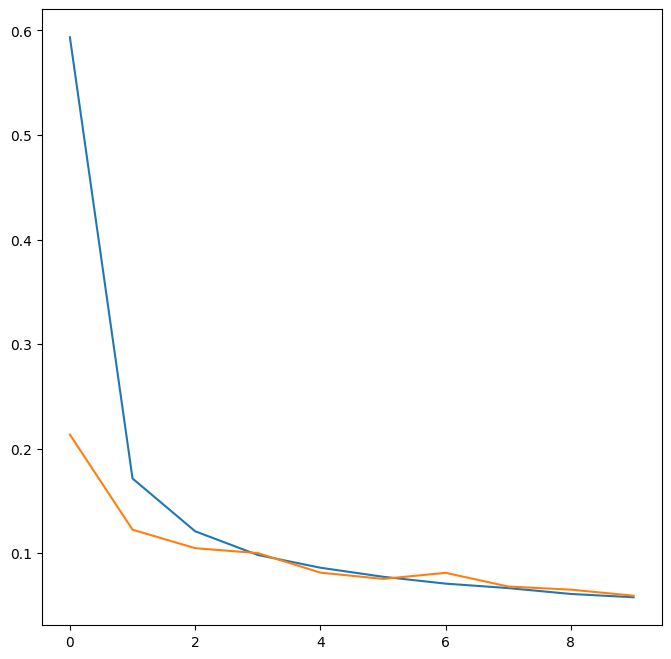

In [143]:
plt.figure(figsize=(8,8))
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])

In [145]:
# as we can see we are using way much less paramters than the ANN models. That's why we are using
# the CNN models. They generalize better.

In [146]:
CNN_model.save("mnist_full_CNN.h5")